In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [33]:
data = pd.read_csv('findcorrelation.csv')

In [34]:
data.head()

,id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,142,252,50,50,0,0,0,0,0,0,0,0,13/4/15
1,158,255,0,0,0,0,0,0,0,100,0,0,15/4/15
2,128,257,0,0,0,46,0,0,0,0,0,0,10/4/2015
3,129,257,0,0,0,0,0,27,48,0,0,0,11/4/2015
4,139,257,0,0,0,0,0,0,47,0,0,0,12/4/2015


In [35]:
data2 = data.groupby('user_id').mean()

In [42]:
data2.head()

,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
user_id,,,,,,,,,,
252,50.0,50.0,0.00,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0
255,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,100.00,0.0,0.0
257,0.0,0.0,0.00,15.333333,0.0,9.0,31.666667,0.00,0.0,0.0
262,49.0,0.0,26.25,25.000000,0.0,8.5,13.000000,38.25,0.0,0.0
264,45.0,0.0,0.00,0.000000,0.0,0.0,34.000000,0.00,0.0,0.0


In [41]:
data2 = data2.drop(['id'], axis = 1)

In [45]:
data2.head()

,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
user_id,,,,,,,,,,
252,50.0,50.0,0.00,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0
255,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,100.00,0.0,0.0
257,0.0,0.0,0.00,15.333333,0.0,9.0,31.666667,0.00,0.0,0.0
262,49.0,0.0,26.25,25.000000,0.0,8.5,13.000000,38.25,0.0,0.0
264,45.0,0.0,0.00,0.000000,0.0,0.0,34.000000,0.00,0.0,0.0


In [43]:
corr = data2.corr()

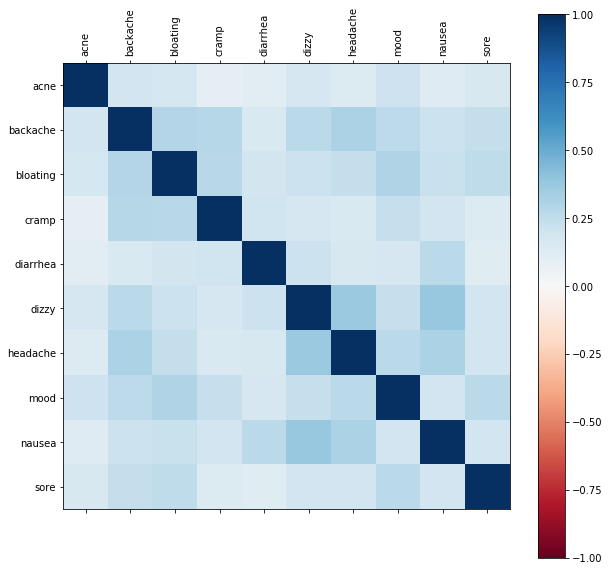

In [199]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='RdBu', vmin=-1, vmax=1)

    
    
fig.colorbar(cax)
ticks = np.arange(0,len(data2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data2.columns)
ax.set_yticklabels(data2.columns)
plt.show()

In [48]:
corr

,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
acne,1.000000,0.191299,0.172215,0.098844,0.110503,0.164259,0.140365,0.206185,0.129095,0.160253
backache,0.191299,1.000000,0.294141,0.284083,0.154271,0.273102,0.312881,0.261643,0.213140,0.235841
bloating,0.172215,0.294141,1.000000,0.275463,0.179884,0.212250,0.239662,0.297240,0.225732,0.252699
cramp,0.098844,0.284083,0.275463,1.000000,0.200483,0.164983,0.151781,0.229956,0.188763,0.133840
diarrhea,0.110503,0.154271,0.179884,0.200483,1.000000,0.214864,0.162408,0.165911,0.268251,0.117883
dizzy,0.164259,0.273102,0.212250,0.164983,0.214864,1.000000,0.368121,0.228472,0.379397,0.194241
headache,0.140365,0.312881,0.239662,0.151781,0.162408,0.368121,1.000000,0.267481,0.316848,0.189961
mood,0.206185,0.261643,0.297240,0.229956,0.165911,0.228472,0.267481,1.000000,0.188097,0.272015
nausea,0.129095,0.213140,0.225732,0.188763,0.268251,0.379397,0.316848,0.188097,1.000000,0.194283
sore,0.160253,0.235841,0.252699,0.133840,0.117883,0.194241,0.189961,0.272015,0.194283,1.000000


In [29]:
pca = PCA()
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
print(pca.components_)

[[ 0.116  0.414  0.423  0.488  0.122  0.143  0.295  0.392  0.173  0.303
   0.     0.   ]
 [ 0.092 -0.099 -0.094 -0.638 -0.032  0.017  0.083  0.674 -0.021  0.323
  -0.     0.   ]
 [ 0.053  0.326 -0.006 -0.418  0.007  0.13   0.501 -0.57   0.139  0.322
  -0.001 -0.003]
 [-0.061  0.206 -0.343 -0.018  0.03   0.131  0.516  0.244  0.092 -0.695
  -0.001 -0.001]
 [ 0.111 -0.182  0.811 -0.331  0.051  0.011  0.056 -0.044  0.013 -0.424
   0.002  0.001]
 [-0.098 -0.789 -0.023  0.226  0.065  0.099  0.489 -0.031  0.174  0.177
  -0.     0.001]
 [ 0.93  -0.107 -0.182  0.048  0.193  0.113 -0.093 -0.067  0.141 -0.07
   0.001 -0.   ]
 [-0.281  0.01  -0.051 -0.13   0.519  0.308 -0.336  0.001  0.651 -0.027
   0.001  0.002]
 [-0.041  0.025 -0.03  -0.022  0.798 -0.443  0.145 -0.011 -0.375  0.032
  -0.002  0.002]
 [-0.056 -0.034  0.003  0.005  0.18   0.795 -0.059 -0.024 -0.572  0.022
   0.001 -0.003]
 [-0.001  0.001 -0.002 -0.    -0.    -0.     0.002 -0.001 -0.002  0.
   0.915  0.403]
 [ 0.001  0.001 -0.    -0

In [31]:
pca.components_

array([[ 0.116,  0.414,  0.423,  0.488,  0.122,  0.143,  0.295,  0.392,
         0.173,  0.303,  0.   ,  0.   ],
       [ 0.092, -0.099, -0.094, -0.638, -0.032,  0.017,  0.083,  0.674,
        -0.021,  0.323, -0.   ,  0.   ],
       [ 0.053,  0.326, -0.006, -0.418,  0.007,  0.13 ,  0.501, -0.57 ,
         0.139,  0.322, -0.001, -0.003],
       [-0.061,  0.206, -0.343, -0.018,  0.03 ,  0.131,  0.516,  0.244,
         0.092, -0.695, -0.001, -0.001],
       [ 0.111, -0.182,  0.811, -0.331,  0.051,  0.011,  0.056, -0.044,
         0.013, -0.424,  0.002,  0.001],
       [-0.098, -0.789, -0.023,  0.226,  0.065,  0.099,  0.489, -0.031,
         0.174,  0.177, -0.   ,  0.001],
       [ 0.93 , -0.107, -0.182,  0.048,  0.193,  0.113, -0.093, -0.067,
         0.141, -0.07 ,  0.001, -0.   ],
       [-0.281,  0.01 , -0.051, -0.13 ,  0.519,  0.308, -0.336,  0.001,
         0.651, -0.027,  0.001,  0.002],
       [-0.041,  0.025, -0.03 , -0.022,  0.798, -0.443,  0.145, -0.011,
        -0.375,  0.032, 

In [50]:
data3 = data.drop(['id'], axis = 1)

In [51]:
data3.head()

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,252,50,50,0,0,0,0,0,0,0,0,13/4/15
1,255,0,0,0,0,0,0,0,100,0,0,15/4/15
2,257,0,0,0,46,0,0,0,0,0,0,10/4/2015
3,257,0,0,0,0,0,27,48,0,0,0,11/4/2015
4,257,0,0,0,0,0,0,47,0,0,0,12/4/2015


In [56]:
data3_multrows = data3.groupby(['user_id']).filter(lambda x : len(x)>1)

In [57]:
data3_multrows.head()

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
2,257,0,0,0,46,0,0,0,0,0,0,10/4/2015
3,257,0,0,0,0,0,27,48,0,0,0,11/4/2015
4,257,0,0,0,0,0,0,47,0,0,0,12/4/2015
5,262,71,0,45,0,0,0,0,53,0,0,12/4/2015
6,262,43,0,0,0,0,34,0,0,0,0,13/4/15


In [87]:
data3_input = data3_multrows.copy()
data3_output = data3_multrows.copy()

In [88]:
data3_output.groupby['user_id'].

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
2,257,0,0,0,46,0,0,0,0,0,0,10/4/2015
3,257,0,0,0,0,0,27,48,0,0,0,11/4/2015
4,257,0,0,0,0,0,0,47,0,0,0,12/4/2015
5,262,71,0,45,0,0,0,0,53,0,0,12/4/2015
6,262,43,0,0,0,0,34,0,0,0,0,13/4/15


In [90]:
data3_output_temp = data3_output

In [91]:
data3_output_temp['']

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
2,257,0,0,0,46,0,0,0,0,0,0,10/4/2015
3,257,0,0,0,0,0,27,48,0,0,0,11/4/2015
4,257,0,0,0,0,0,0,47,0,0,0,12/4/2015
5,262,71,0,45,0,0,0,0,53,0,0,12/4/2015
6,262,43,0,0,0,0,34,0,0,0,0,13/4/15
7,262,39,0,0,0,0,0,0,0,0,0,16/4/15
8,262,43,0,60,100,0,0,52,100,0,0,28/9/15
14,278,0,20,15,0,0,17,15,0,0,0,14/4/15
15,278,0,0,0,24,39,59,55,0,49,0,2/9/2015
16,278,0,26,0,66,0,41,0,52,27,41,30/10/15


In [80]:
dftemp =  data3_input.groupby('user_id', as_index=False).apply(lambda x: x.iloc[:-1])

In [83]:
dftemp[dftemp.columns[1:12]]

acne  backache  bloating  cramp  diarrhea  dizzy  headache  mood  \
0    2         0         0         0     46         0      0         0     0   
     3         0         0         0      0         0     27        48     0   
1    5        71         0        45      0         0      0         0    53   
     6        43         0         0      0         0     34         0     0   
     7        39         0         0      0         0      0         0     0   
2    14        0        20        15      0         0     17        15     0   
     15        0         0         0     24        39     59        55     0   
     16        0        26         0     66         0     41         0    52   
     17        0         0         0     50         0      0         0    23   
     18        0        21         0     44        47     22        41     0   
     19        0         0         0     50         0     28        33     0   
     20       36         0        27     38         0      0         0     0   
3    24        0         0         0      0         0      0        22    15   
4    26        0         0         0      0         0      0        29    28   
5    30       30        48        56     55        60      0        50     0   
6    38        0         0         0     50         0      0        38    55   
7    44       68        60        24      0        50      0         0    34   
     45       41        98        38    100         0      0        34    71   
     46       45        33        86      0        39      0        40     0   
     47       42         0        90      0        25      0         0     0   
     48       32        48       100     42        30     61         0    74   
     49       47         0        74    100         0      0         0    54   
     50       53         0       100     29        33     50         0    73   
8    53        0         0         0      8         0      0         0     0   
9    56        0         0         0      8         0      0         0     0   
     57        0         0         0      0         0      0         0     0   
     58        0         0         0      0         0      0         0     0   
     59        0         0         0     50         0      0         0     0   
     60        0         0         0     63         0      0         0     0   
     61        0         0         0     33         0      0         0     0   
...          ...       ...       ...    ...       ...    ...       ...   ...   
1523 11149     0         0         0      0         0     17         0    20   
     11150     0         0         0     74         0      0         0     0   
     11151     0        38         0     33         0      0        31     0   
     11152     0         0         0     42         0      0         0     0   
     11153     0        13         0      0         0      0         0     0   
1524 11155     0         0         0      0         0      0         0    85   
1525 11157    48         0         0     74         0      0        42     0   
     11158    41         0         0      0         0      0         0     0   
     11159     0         0         0      0         0      0        44     0   
     11160    36         0         0     44         0      0         0     0   
     11161    37         0         0      0         0      0         0     0   
     11162    26         0         0      0         0      0         0     0   
     11163    25         0         0      0         0      0         0     0   
     11164    39         0         0      0         0      0         0     0   
     11165    29         0         0      0         0      0         0     0   
     11166    25         0         0      0         0      0         0     0   
     11167     0         0         0     51         0      0         0     0   
     11168    27         0         0      0         0      0         0     0   
     11169  

In [93]:
dftemp.columns

Index(['user_id', 'acne', 'backache', 'bloating', 'cramp', 'diarrhea', 'dizzy',
       'headache', 'mood', 'nausea', 'sore', 'date'],
      dtype='object')

In [96]:
dftemp_clean = dftemp.reset_index()

In [100]:
del dftemp_clean['level_0']
del dftemp_clean['level_1']
del dftemp_clean['user_id']

In [101]:
dftemp_clean

,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,0,0,0,46,0,0,0,0,0,0,10/4/2015
1,0,0,0,0,0,27,48,0,0,0,11/4/2015
2,71,0,45,0,0,0,0,53,0,0,12/4/2015
3,43,0,0,0,0,34,0,0,0,0,13/4/15
4,39,0,0,0,0,0,0,0,0,0,16/4/15
5,0,20,15,0,0,17,15,0,0,0,14/4/15
6,0,0,0,24,39,59,55,0,49,0,2/9/2015
7,0,26,0,66,0,41,0,52,27,41,30/10/15
8,0,0,0,50,0,0,0,23,0,11,1/11/2015
9,0,21,0,44,47,22,41,0,42,0,12/3/2016


In [144]:
count =  data3_output.groupby('user_id')['user_id', 'acne'].count() #.apply(lambda x: x.iloc[:-1])

In [152]:
count

,user_id,acne
user_id,,
257,2,3
262,3,4
278,7,8
286,1,2
297,1,2
306,1,2
337,1,2
351,7,8
359,1,2


In [151]:
count['user_id'] = count['user_id'].apply(lambda x: x-1)

In [129]:
data3_output.head(30)

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
2,257,0,0,0,46,0,0,0,0,0,0,10/4/2015
3,257,0,0,0,0,0,27,48,0,0,0,11/4/2015
4,257,0,0,0,0,0,0,47,0,0,0,12/4/2015
5,262,71,0,45,0,0,0,0,53,0,0,12/4/2015
6,262,43,0,0,0,0,34,0,0,0,0,13/4/15
7,262,39,0,0,0,0,0,0,0,0,0,16/4/15
8,262,43,0,60,100,0,0,52,100,0,0,28/9/15
14,278,0,20,15,0,0,17,15,0,0,0,14/4/15
15,278,0,0,0,24,39,59,55,0,49,0,2/9/2015
16,278,0,26,0,66,0,41,0,52,27,41,30/10/15


In [125]:
dftemp_output_maxid =  data3_output.groupby('user_id')['user_id'].idxmax() #.apply(lambda x: x.iloc[:-1])

In [135]:
data3_output.index

Int64Index([    2,     3,     4,     5,     6,     7,     8,    14,    15,
               16,
            ...
            11174, 11175, 11176, 11177, 11178, 11179, 11180, 11182, 11183,
            11184],
           dtype='int64', length=9548)

In [134]:
data3_output.groupby('user_id').max().index

Int64Index([ 257,  262,  278,  286,  297,  306,  337,  351,  359,  378,
            ...
            7001, 7005, 7006, 7015, 7019, 7036, 7037, 7045, 7049, 7051],
           dtype='int64', name='user_id', length=1528)

In [137]:
data3_output

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
2,257,0,0,0,46,0,0,0,0,0,0,10/4/2015
3,257,0,0,0,0,0,27,48,0,0,0,11/4/2015
4,257,0,0,0,0,0,0,47,0,0,0,12/4/2015
5,262,71,0,45,0,0,0,0,53,0,0,12/4/2015
6,262,43,0,0,0,0,34,0,0,0,0,13/4/15
7,262,39,0,0,0,0,0,0,0,0,0,16/4/15
8,262,43,0,60,100,0,0,52,100,0,0,28/9/15
14,278,0,20,15,0,0,17,15,0,0,0,14/4/15
15,278,0,0,0,24,39,59,55,0,49,0,2/9/2015
16,278,0,26,0,66,0,41,0,52,27,41,30/10/15


In [156]:
lastrow =  data3_output.groupby('user_id', as_index=False).apply(lambda x: x.iloc[-1])

In [139]:
dftemp_output.head()

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,257,0,0,0,0,0,0,47,0,0,0,12/4/2015
1,262,43,0,60,100,0,0,52,100,0,0,28/9/15
2,278,0,28,0,42,0,37,54,0,0,13,13/3/19
3,286,3,0,0,0,0,6,34,7,0,0,14/4/15
4,297,12,0,27,53,0,0,17,0,0,0,15/4/15


In [154]:
count = list(count['user_id'])

In [155]:
count

[2,
 3,
 7,
 1,
 1,
 1,
 1,
 7,
 1,
 9,
 9,
 1,
 3,
 2,
 6,
 3,
 3,
 9,
 1,
 1,
 11,
 2,
 8,
 2,
 1,
 4,
 2,
 1,
 123,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 11,
 1,
 1,
 1,
 1,
 4,
 2,
 9,
 1,
 1,
 1,
 3,
 3,
 10,
 3,
 1,
 7,
 1,
 4,
 2,
 1,
 2,
 2,
 1,
 3,
 2,
 1,
 1,
 1,
 9,
 1,
 5,
 1,
 2,
 1,
 2,
 5,
 2,
 2,
 1,
 11,
 1,
 12,
 2,
 3,
 3,
 1,
 3,
 2,
 2,
 1,
 8,
 1,
 23,
 4,
 4,
 1,
 20,
 11,
 6,
 12,
 6,
 7,
 4,
 1,
 1,
 14,
 26,
 2,
 12,
 8,
 1,
 1,
 8,
 20,
 1,
 2,
 6,
 1,
 5,
 6,
 2,
 7,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 13,
 45,
 6,
 10,
 1,
 2,
 7,
 5,
 1,
 1,
 11,
 1,
 1,
 3,
 9,
 2,
 6,
 4,
 1,
 3,
 3,
 3,
 35,
 4,
 6,
 1,
 1,
 1,
 9,
 1,
 1,
 8,
 4,
 10,
 1,
 1,
 16,
 4,
 19,
 2,
 4,
 1,
 2,
 2,
 18,
 4,
 10,
 1,
 3,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 8,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 2,
 179,
 2,
 8,
 3,
 10,
 1,
 1,
 1,
 4,
 2,
 15,
 1,
 1,
 2,
 6,
 5,
 4,
 7,
 8,
 1,
 13,
 13,
 8,
 4,
 1,
 9,
 1,
 1,
 1,
 1,
 8,
 2,
 2,
 1,
 2,
 3,
 1,
 3,
 2,
 28,
 1,
 1,
 6,
 3,
 6,
 1,


In [170]:
#df.append([df_try]*5,ignore_index=True)
lastrow.iloc[0:1]

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,257,0,0,0,0,0,0,47,0,0,0,12/4/2015


In [186]:
counter_ = 0
cleaned = pd.DataFrame()
for i in count:
    cleaned = cleaned.append(pd.concat([lastrow.iloc[counter_:counter_+1]]*i))
    counter_ +=1

In [187]:
cleaned

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,257,0,0,0,0,0,0,47,0,0,0,12/4/2015
0,257,0,0,0,0,0,0,47,0,0,0,12/4/2015
1,262,43,0,60,100,0,0,52,100,0,0,28/9/15
1,262,43,0,60,100,0,0,52,100,0,0,28/9/15
1,262,43,0,60,100,0,0,52,100,0,0,28/9/15
2,278,0,28,0,42,0,37,54,0,0,13,13/3/19
2,278,0,28,0,42,0,37,54,0,0,13,13/3/19
2,278,0,28,0,42,0,37,54,0,0,13,13/3/19
2,278,0,28,0,42,0,37,54,0,0,13,13/3/19
2,278,0,28,0,42,0,37,54,0,0,13,13/3/19


In [166]:
len(data3_output)

9548

In [217]:
d_input = dftemp_clean.drop('date', axis = 1)
d_output = cleaned.drop(['user_id', 'date'], axis = 1)

In [218]:
d_input.shape

(8020, 10)

In [219]:
d_output.shape

(8020, 10)

In [220]:
d_input.to_csv('symptoms_input.csv',index=False)
d_output.to_csv('symptoms_output.csv',index=False)